In [1]:
#!/usr/bin/env python

*********************************************************************<br>
PROGRAM TO PLOT LOAD GREEN'S FUNCTIONS (OUTPUT FROM run_gf.py)<br>
<br>
Copyright (c) 2014-2019: HILARY R. MARTENS, LUIS RIVERA, MARK SIMONS         <br>
<br>
This file is part of LoadDef.<br>
<br>
   LoadDef is free software: you can redistribute it and/or modify<br>
   it under the terms of the GNU General Public License as published by<br>
   the Free Software Foundation, either version 3 of the License, or<br>
   any later version.<br>
<br>
   LoadDef is distributed in the hope that it will be useful,<br>
   but WITHOUT ANY WARRANTY; without even the implied warranty of<br>
   MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br>
   GNU General Public License for more details.<br>
<br>
   You should have received a copy of the GNU General Public License<br>
   along with LoadDef.  If not, see <https://www.gnu.org/licenses/>.<br>
<br>
*********************************************************************

MODIFY PYTHON PATH TO INCLUDE 'LoadDef' DIRECTORY

In [2]:
from __future__ import print_function
import sys
import os
sys.path.append(os.getcwd() + "/../")

Import Python Modules

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colorbar as clb
import matplotlib.cm as cm
import numpy as np

Filenames for Input Load Greens Function Files

In [4]:
extension = "PREM"
gfcm = ("../../output/Greens_Functions/cm_" + extension + ".txt")
gfce = ("../../output/Greens_Functions/ce_" + extension + ".txt")
gfcf = ("../../output/Greens_Functions/cf_" + extension + ".txt")

Output Figure Name

In [5]:
figname1 = ("Greens_Functions_Displacement_" + extension + ".pdf")
figname2 = ("Greens_Functions_Displacement_Overplot_" + extension + ".pdf")
figname3 = ("Greens_Functions_Strain_" + extension + ".pdf")
figname4 = ("Greens_Functions_Gravity_Tilt_" + extension + ".pdf")
figname5 = ("Greens_Functions_Gravity_Tilt_NormByNewtonian_" + extension + ".pdf")
figname6 = ("Greens_Functions_Gravity_Tilt_Strain_" + extension + ".pdf")
 
# X-axis Limits
xmin = 0.001
xmax = 170.

## BEGIN CODE

Create Folder

In [6]:
if not (os.path.isdir("./output/")):
    os.makedirs("./output/")
outdir = "./output/"
 
# Read the Files
thcm,ucm,vcm,gecm,tecm,ettcm,ellcm,gncm,tncm = np.loadtxt(gfcm,usecols=(0,3,4,5,6,8,9,10,11),unpack=True,skiprows=5)
thce,uce,vce,gece,tece,ettce,ellce,gnce,tnce = np.loadtxt(gfce,usecols=(0,3,4,5,6,8,9,10,11),unpack=True,skiprows=5)
thcf,ucf,vcf,gecf,tecf,ettcf,ellcf,gncf,tncf = np.loadtxt(gfcf,usecols=(0,3,4,5,6,8,9,10,11),unpack=True,skiprows=5)

Plot Figure

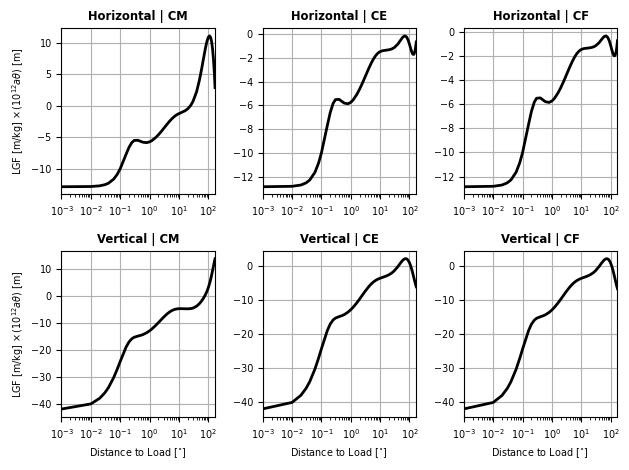

In [7]:
fig1=plt.figure()
plt.subplot(2,3,1)
plt.plot(thcm[0:-1],vcm[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.ylabel(r'LGF [m/kg] $\times \, (10^{12} a \theta)$ [m]',size='x-small')
plt.tick_params(labelsize='x-small')
plt.title('Horizontal | CM',size='small',weight='bold')
plt.subplot(2,3,4)
plt.plot(thcm[0:-1],ucm[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.xlabel(r'Distance to Load [$^{\circ}$] ',size='x-small')
plt.tick_params(labelsize='x-small')
plt.title('Vertical | CM',size='small',weight='bold')
plt.ylabel(r'LGF [m/kg] $\times \, (10^{12} a \theta)$ [m]',size='x-small')
plt.subplot(2,3,2)
plt.plot(thce[0:-1],vce[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.tick_params(labelsize='x-small')
plt.title('Horizontal | CE',size='small',weight='bold')
plt.subplot(2,3,5)
plt.plot(thce[0:-1],uce[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.xscale('log')
plt.xlabel(r'Distance to Load [$^{\circ}$] ',size='x-small')
plt.tick_params(labelsize='x-small')
plt.title('Vertical | CE',size='small',weight='bold')
plt.subplot(2,3,3)
plt.plot(thcf[0:-1],vcf[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.tick_params(labelsize='x-small')
plt.title('Horizontal | CF',size='small',weight='bold')
plt.subplot(2,3,6)
plt.plot(thcf[0:-1],ucf[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.xscale('log')
plt.xlabel(r'Distance to Load [$^{\circ}$] ',size='x-small')
plt.tick_params(labelsize='x-small')
plt.title('Vertical | CF',size='small',weight='bold')
plt.tight_layout()
plt.savefig((outdir+figname1),orientation='landscape',format='pdf')
plt.show()

Plot CE/CM on Same Figure

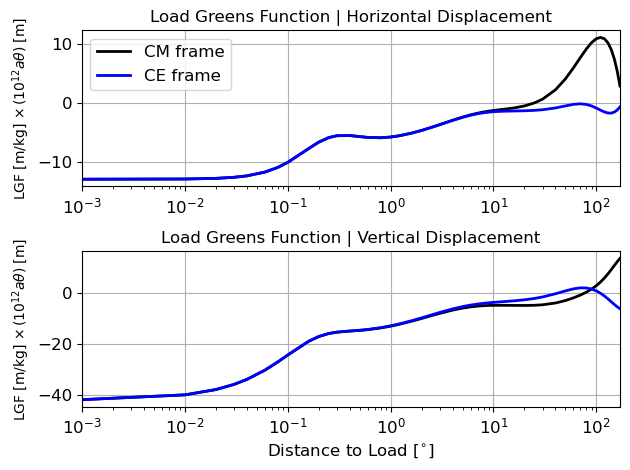

In [8]:
fig1=plt.figure()
plt.subplot(2,1,1)
plt.plot(thcm[0:-1],vcm[0:-1],color='k',linestyle='-',linewidth=2,label='CM frame')
plt.plot(thce[0:-1],vce[0:-1],color='b',linestyle='-',linewidth=2,label='CE frame')
plt.legend(loc=2,fontsize='large')
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.ylabel(r'LGF [m/kg] $\times \, (10^{12} a \theta)$ [m]',size='medium')
plt.tick_params(labelsize='large')
plt.title('Load Greens Function | Horizontal Displacement',size='large')
plt.subplot(2,1,2)
plt.plot(thcm[0:-1],ucm[0:-1],color='k',linestyle='-',linewidth=2,label='CM frame')
plt.plot(thce[0:-1],uce[0:-1],color='b',linestyle='-',linewidth=2,label='CE frame')
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.xlabel(r'Distance to Load [$^{\circ}$] ',size='large')
plt.tick_params(labelsize='large')
plt.title('Load Greens Function | Vertical Displacement',size='large')
plt.ylabel(r'LGF [m/kg] $\times \, (10^{12} a \theta)$ [m]',size='medium')
plt.tight_layout()
plt.savefig((outdir+figname2),orientation='landscape',format='pdf')
plt.show()

Plot Strain LGF Figure

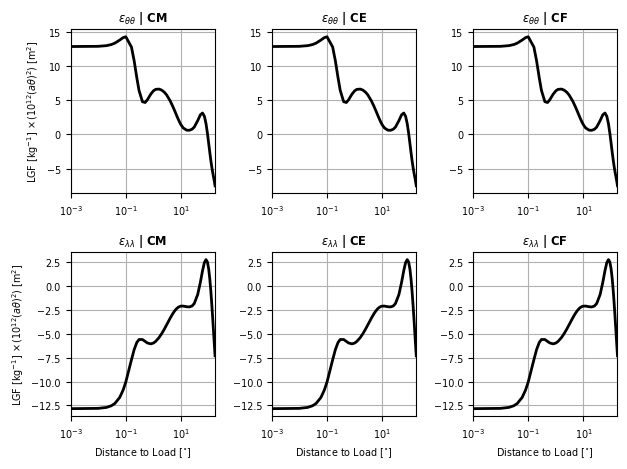

In [9]:
fig2=plt.figure()
plt.subplot(2,3,1)
plt.plot(thcm[0:-1],ettcm[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.ylabel(r'LGF [kg$^{-1}$] $\times \, (10^{12} (a \theta)^2)$ [m$^2$]',size='x-small')
plt.tick_params(labelsize='x-small')
plt.title(r'$\epsilon_{\theta\theta}$ | CM',size='small',weight='bold')
plt.subplot(2,3,4)
plt.plot(thcm[0:-1],ellcm[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.xlabel(r'Distance to Load [$^{\circ}$] ',size='x-small')
plt.tick_params(labelsize='x-small')
plt.title(r'$\epsilon_{\lambda\lambda}$ | CM',size='small',weight='bold')
plt.ylabel(r'LGF [kg$^{-1}$] $\times \, (10^{12} (a \theta)^2)$ [m$^2$]',size='x-small')
plt.subplot(2,3,2)
plt.plot(thce[0:-1],ettce[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.tick_params(labelsize='x-small')
plt.title(r'$\epsilon_{\theta\theta}$ | CE',size='small',weight='bold')
plt.subplot(2,3,5)
plt.plot(thce[0:-1],ellce[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.xscale('log')
plt.xlabel(r'Distance to Load [$^{\circ}$] ',size='x-small')
plt.tick_params(labelsize='x-small')
plt.title(r'$\epsilon_{\lambda\lambda}$ | CE',size='small',weight='bold')
plt.subplot(2,3,3)
plt.plot(thcf[0:-1],ettcf[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.tick_params(labelsize='x-small')
plt.title(r'$\epsilon_{\theta\theta}$ | CF',size='small',weight='bold')
plt.subplot(2,3,6)
plt.plot(thcf[0:-1],ellcf[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.xscale('log')
plt.xlabel(r'Distance to Load [$^{\circ}$] ',size='x-small')
plt.tick_params(labelsize='x-small')
plt.title(r'$\epsilon_{\lambda\lambda}$ | CF',size='small',weight='bold')
plt.tight_layout()
plt.savefig((outdir+figname3),orientation='landscape',format='pdf')
plt.show()

Plot Gravity and Tilt LGF Figure

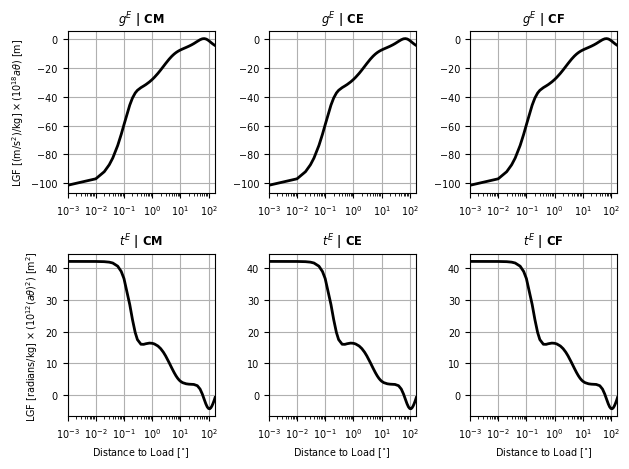

In [10]:
fig3=plt.figure()
plt.subplot(2,3,1)
plt.plot(thcm[0:-1],gecm[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.ylabel(r'LGF [(m/s$^2$)/kg] $\times \, (10^{18} a \theta)$ [m]',size='x-small')
plt.tick_params(labelsize='x-small')
plt.title(r'$g^{E}$ | CM',size='small',weight='bold')
plt.subplot(2,3,4)
plt.plot(thcm[0:-1],tecm[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.xlabel(r'Distance to Load [$^{\circ}$] ',size='x-small')
plt.tick_params(labelsize='x-small')
plt.title(r'$t^{E}$ | CM',size='small',weight='bold')
plt.ylabel(r'LGF [radians/kg] $\times \, (10^{12} (a \theta)^2)$ [m$^2$]',size='x-small')
plt.subplot(2,3,2)
plt.plot(thce[0:-1],gece[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.tick_params(labelsize='x-small')
plt.title(r'$g^E$ | CE',size='small',weight='bold')
plt.subplot(2,3,5)
plt.plot(thce[0:-1],tece[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.xscale('log')
plt.xlabel(r'Distance to Load [$^{\circ}$] ',size='x-small')
plt.tick_params(labelsize='x-small')
plt.title(r'$t^E$ | CE',size='small',weight='bold')
plt.subplot(2,3,3)
plt.plot(thcf[0:-1],gecf[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.tick_params(labelsize='x-small')
plt.title(r'$g^E$ | CF',size='small',weight='bold')
plt.subplot(2,3,6)
plt.plot(thcf[0:-1],tecf[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.xscale('log')
plt.xlabel(r'Distance to Load [$^{\circ}$] ',size='x-small')
plt.tick_params(labelsize='x-small')
plt.title(r'$t^E$ | CF',size='small',weight='bold')
plt.tight_layout()
plt.savefig((outdir+figname4),orientation='landscape',format='pdf')
plt.show()

Plot Gravity and Tilt LGF Figure (Elastic/Newtonian)

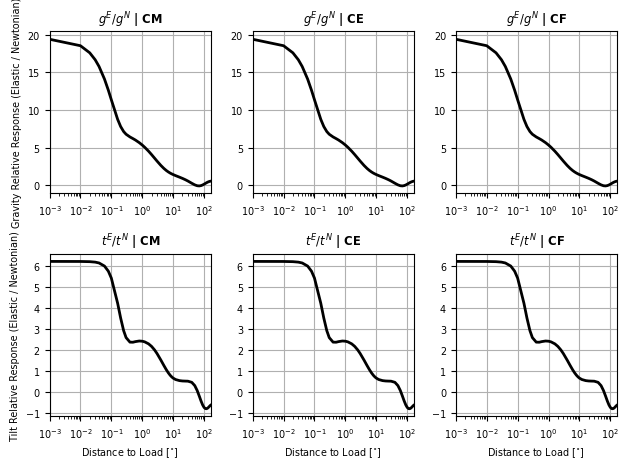

In [11]:
fig4=plt.figure()
plt.subplot(2,3,1)
plt.plot(thcm[0:-1],np.divide(gecm[0:-1],gncm[0:-1]),color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.ylabel('Gravity Relative Response (Elastic / Newtonian)',size='x-small')
plt.tick_params(labelsize='x-small')
plt.title(r'$g^E / g^N$ | CM',size='small',weight='bold')
plt.subplot(2,3,4)
plt.plot(thcm[0:-1],np.divide(tecm[0:-1],tncm[0:-1]),color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.xlabel(r'Distance to Load [$^{\circ}$] ',size='x-small')
plt.tick_params(labelsize='x-small')
plt.title(r'$t^E / t^N$ | CM',size='small',weight='bold')
plt.ylabel('Tilt Relative Response (Elastic / Newtonian)',size='x-small')
plt.subplot(2,3,2)
plt.plot(thce[0:-1],np.divide(gece[0:-1],gnce[0:-1]),color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.tick_params(labelsize='x-small')
plt.title(r'$g^E / g^N$ | CE',size='small',weight='bold')
plt.subplot(2,3,5)
plt.plot(thce[0:-1],np.divide(tece[0:-1],tnce[0:-1]),color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.xscale('log')
plt.xlabel(r'Distance to Load [$^{\circ}$] ',size='x-small')
plt.tick_params(labelsize='x-small')
plt.title(r'$t^E / t^N$ | CE',size='small',weight='bold')
plt.subplot(2,3,3)
plt.plot(thcf[0:-1],np.divide(gecf[0:-1],gncf[0:-1]),color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.tick_params(labelsize='x-small')
plt.title(r'$g^E / g^N$ | CF',size='small',weight='bold')
plt.subplot(2,3,6)
plt.plot(thcf[0:-1],np.divide(tecf[0:-1],tncf[0:-1]),color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.xscale('log')
plt.xlabel(r'Distance to Load [$^{\circ}$] ',size='x-small')
plt.tick_params(labelsize='x-small')
plt.title(r'$t^E / t^N$ | CF',size='small',weight='bold')
plt.tight_layout()
plt.savefig((outdir+figname5),orientation='landscape',format='pdf')
plt.show()

Plot Gravity, Tilt, and Strain LGF Figure

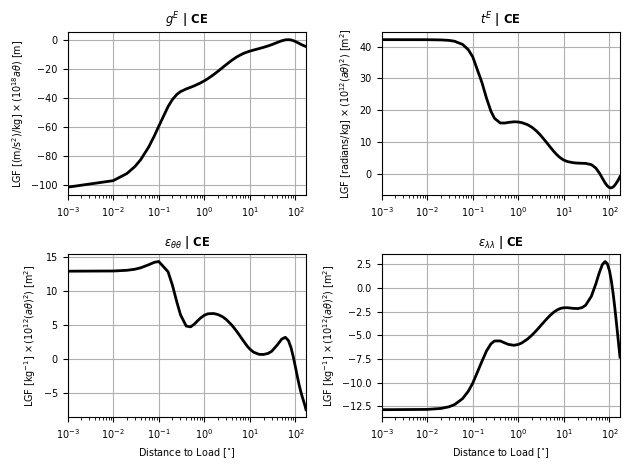

In [12]:
fig5=plt.figure()
plt.subplot(2,2,1)
plt.plot(thce[0:-1],gece[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.ylabel(r'LGF [(m/s$^2$)/kg] $\times \, (10^{18} a \theta)$ [m]',size='x-small')
plt.tick_params(labelsize='x-small')
plt.title(r'$g^{E}$ | CE',size='small',weight='bold')
plt.subplot(2,2,2)
plt.plot(thce[0:-1],tece[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.tick_params(labelsize='x-small')
plt.title(r'$t^{E}$ | CE',size='small',weight='bold')
plt.ylabel(r'LGF [radians/kg] $\times \, (10^{12} (a \theta)^2)$ [m$^2$]',size='x-small')
plt.subplot(2,2,3)
plt.plot(thce[0:-1],ettce[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.xlabel(r'Distance to Load [$^{\circ}$] ',size='x-small')
plt.ylabel(r'LGF [kg$^{-1}$] $\times \, (10^{12} (a \theta)^2)$ [m$^2$]',size='x-small')
plt.tick_params(labelsize='x-small')
plt.title(r'$\epsilon_{\theta\theta}$ | CE',size='small',weight='bold')
plt.subplot(2,2,4)
plt.plot(thce[0:-1],ellce[0:-1],color='k',linestyle='-',linewidth=2)
plt.xlim(xmin, xmax)
plt.xscale('log')
plt.grid(True)
plt.xlabel(r'Distance to Load [$^{\circ}$] ',size='x-small')
plt.tick_params(labelsize='x-small')
plt.title(r'$\epsilon_{\lambda\lambda}$ | CE',size='small',weight='bold')
plt.ylabel(r'LGF [kg$^{-1}$] $\times \, (10^{12} (a \theta)^2)$ [m$^2$]',size='x-small')
plt.tight_layout()
plt.savefig((outdir+figname6),orientation='landscape',format='pdf')
plt.show()